# Sampling Methods

In [2]:
f = @(x) sin(x);  % Define the function: it should be nonnegative and integrable
a = 0; b = pi;    % Set the integration limits
Mf = 1;           % The upper bound of the function f
c_val = integral(f,a,b)   % The exact value of the integral of f(x) from a to b
pdf_f = @(x) f(x)/c_val;  % The pdf proportional to f
N = 10000;                % The number of samples

c_val = 2.0000


## Inverse CDF method

In [3]:
cdf_f  = @(x) (1-cos(x))/c_val;     % The exact CDF
icdf_f = @(u) pi - acos(u*c_val-1); % The exact inverse CDF

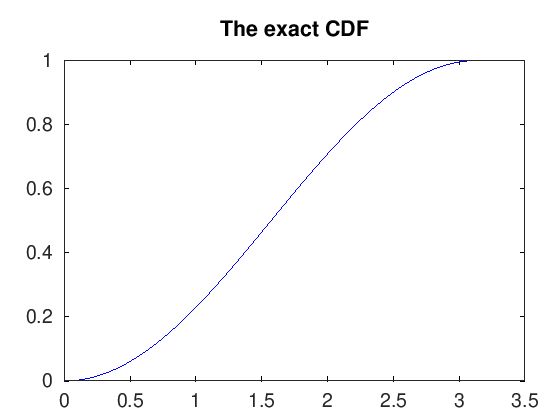

In [4]:
plot(linspace(a,b,100),cdf_f(linspace(a,b,100)),'b');
hold on;
title({ 'The exact CDF'})
set(gca,'fontsize',15)
hold off

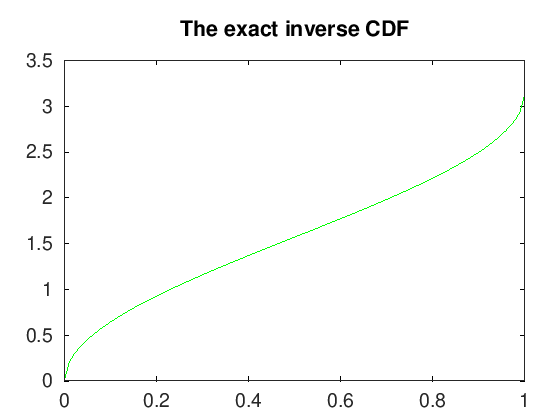

In [5]:
plot(linspace(0,1,100),icdf_f(linspace(0,1,100)),'g');
hold on;
title({ 'The exact inverse CDF'})
set(gca,'fontsize',15)
hold off

In [6]:
U = rand(N,1);
X_ICDF = icdf_f(U);

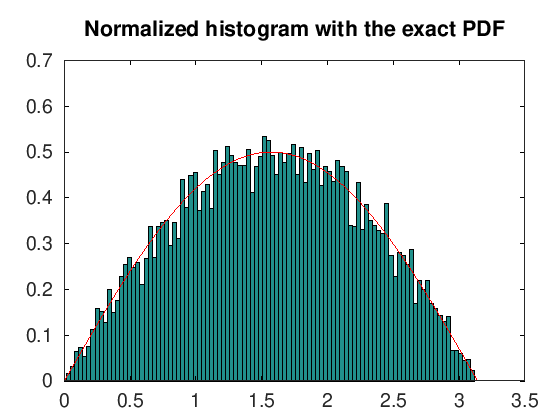

In [7]:
NumBin = 100;
hist(X_ICDF,NumBin,1/((b-a)/NumBin));  
hold on;
plot(linspace(a,b,100),pdf_f(linspace(a,b,100)),'r');
title({ 'Normalized histogram with the exact PDF'})
set(gca,'fontsize',15)
hold off

## Acceptance-Rejection Method 

### The Neumann Method

In [8]:
XN = (b-a)*rand(N,1)+a; YN = Mf*rand(N,1);  % The X and Y coordinates of sampled points for the Neumann method
IBP = (YN < f(XN));  % Mark the points below the plot

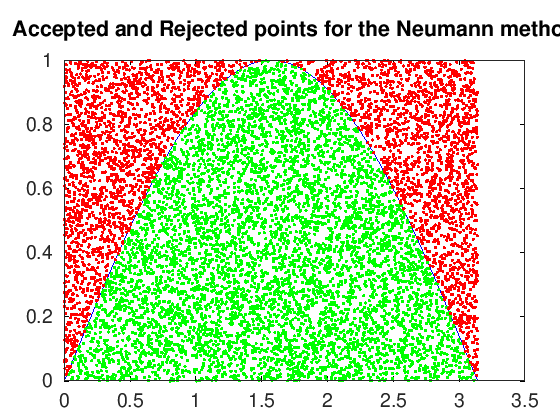

In [9]:
XB = XN(IBP); YB = YN(IBP);  % The points below the plot
XU = XN(not(IBP)); YU = YN(not(IBP));  % The points abovee the plot
plot(linspace(a,b,100),f(linspace(a,b,100)),'b');
hold on;
plot(XB,YB,'g.')
plot(XU,YU,'r.')
title({ 'Accepted and Rejected points for the Neumann method'})
set(gca,'fontsize',15)
hold off


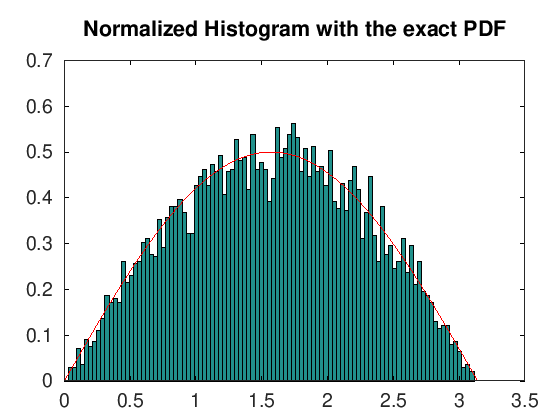

In [10]:
NumBin = 100;
hist(XB,NumBin,1/((b-a)/NumBin));  
hold on;
plot(linspace(a,b,100),pdf_f(linspace(a,b,100)),'r');
title({ 'Normalized Histogram with the exact PDF'})
set(gca,'fontsize',15)
hold off

In [11]:
PA_est = mean(IBP); % The estimate for the acceptance probsbility
PA_exact = c_val / ((b-a)*Mf);  % Mark the points below the plot

In [12]:
fprintf('The Neumann Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Acceptance probability (estimate) is %8.4f\n',PA_est)
fprintf('Acceptance probability (exact) is %8.5f\n',PA_exact)

The Neumann Method
Sample size is 10000
Acceptance probability (estimate) is   0.6333
Acceptance probability (exact) is  0.63662


### The Envelop Method with $g(x)=x\mathbb{I}_{[0,\pi/2)}(x) + (\pi-x)\mathbb{I}_{[\pi/2,\pi]}(x)$ 

In [13]:
g = @(x) (x-a).*(x<(b+a)/2) + (b-x).*(x>=(b+a)/2);  % The envelop function so that f(x) <= g(x)
c_val_g = integral(g,a,b)
pdf_g = @(x) g(x)/c_val_g;  % the density proportional to g(x)
cdf_G = @(x) (x-a).^2.*(x<(b+a)/2)/cval2/2 + (1-(b-x).^2/c_val_g/2).*(x>=(b+a)/2) ;  % the CDF for the proposed distribution
icdf_G = @(u) (sqrt(2*c_val_g*u)+a).*(u<0.5)+ (b-sqrt(2*c_val_g*(1-u))).*(u>=0.5);   % the inverse CDF for the proposed distribution

c_val_g = 2.4674


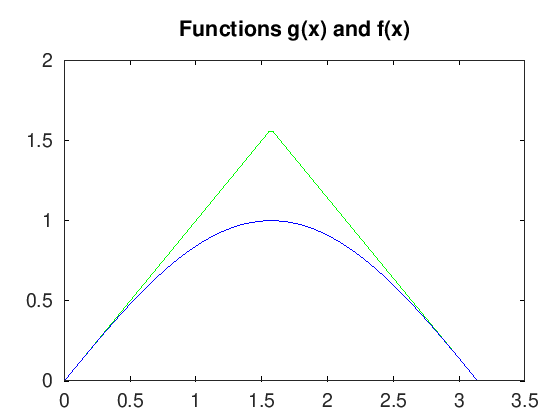

In [14]:
plot(linspace(a,b,100),g(linspace(a,b,100)),'g')
hold on
plot(linspace(a,b,100),f(linspace(a,b,100)),'b')
title({ 'Functions g(x) and f(x)'})
set(gca,'fontsize',15)
hold off

In [15]:
U = rand(N,1);     % The uniform samples
XG = icdf_G(U);    % The samples of X ~ pdf_g
YG = rand(N,1).*g(XG);  % The Y coordinates of sampled points
IGBP = (YG < f(XG));    % Mark the points below the plot

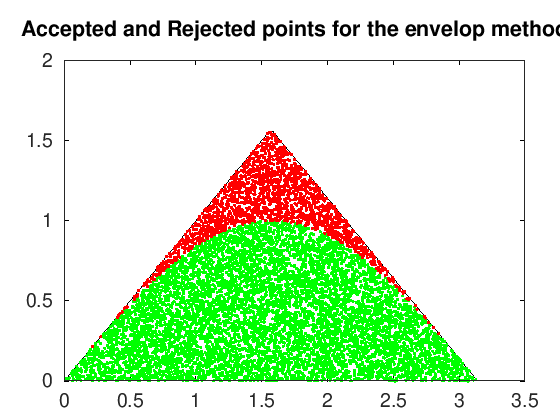

In [16]:
XGB = XG(IGBP); YGB = YG(IGBP);  % The points below the plot
XGU = XG(not(IGBP)); YGU = YG(not(IGBP));  % The points abovee the plot
plot(linspace(a,b,100),f(linspace(a,b,100)),'b');
plot(linspace(a,b,100),g(linspace(a,b,100)),'k');
hold on;
plot(XGB,YGB,'g.')
plot(XGU,YGU,'r.')
title({ 'Accepted and Rejected points for the envelop method'})
set(gca,'fontsize',15)
hold off



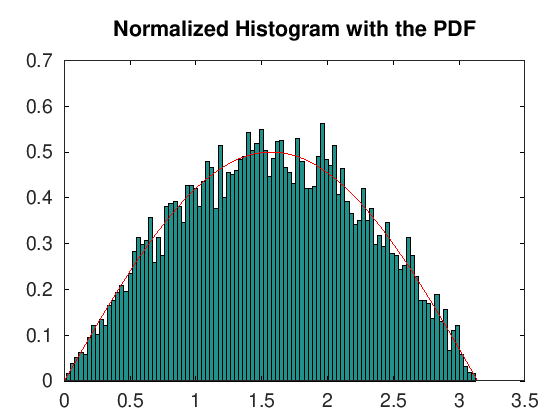

In [17]:
NumBin = 100;
hist(XGB,NumBin,1/((b-a)/NumBin));  
hold on;
plot(linspace(a,b,100),pdf_f(linspace(a,b,100)),'r');
title({ 'Normalized Histogram with the PDF'})
set(gca,'fontsize',15)
hold off

In [18]:
PA_estG = mean(IGBP); % The estimate for the acceptance probsbility
PA_exactG = c_val_g / ((b-a)*Mf);  % Mark the points below the plot

In [19]:
fprintf('The envelop Method\n')
fprintf('Sample size is %5d\n',N)
fprintf('Acceptance probability (estimate) is %8.4f\n',PA_estG)
fprintf('Acceptance probability (exact) is %8.5f\n',PA_exactG)

The envelop Method
Sample size is 10000
Acceptance probability (estimate) is   0.8108
Acceptance probability (exact) is  0.78540
